In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Introduction:
Monte Carlo methods are a class of computational algorithms that rely on repeated random sampling o estimate numerical results. They are particularly useful for problems involving integration, optimization, and probablistic moeling. Monte carlo relies on the **Law of Large Numbers** which states that if $X_1,X_2,...,X_n$ are independent and identically distributed random variables with expected value $\mu$, then:
$$\frac{1}{n}\sum^{n}_{i=1}X_i \rightarrow \mu \text{ as }n \rightarrow∞$$
For an anecdotal example of Monte Carlo methods using random samples of jelly beans in a jar, please check out my notebook here.
# Esimating $\pi$:
We will first estimate pi using Monte Carlo by calculating the area of a unit circle inscribed in a square. The ratio of a circle's area to the square's area is $\frac{\pi}{4}$ therefore:
$$\pi \approx 4 \cdot \text{ (fraction of points inside the circle)}$$
The process is as follows:
- Generate random points $(x,y)$ in the unit square [0,1]x[0,1]
- Calculate the distances from the origin, since we are using the unit circle,
- Find the points that are within the unit circle i.e. points that have a distance less than 1
- Estimate $\pi$ using the above ratio
This is perfromed in the following python code:
Code




(3.1, 3.19)

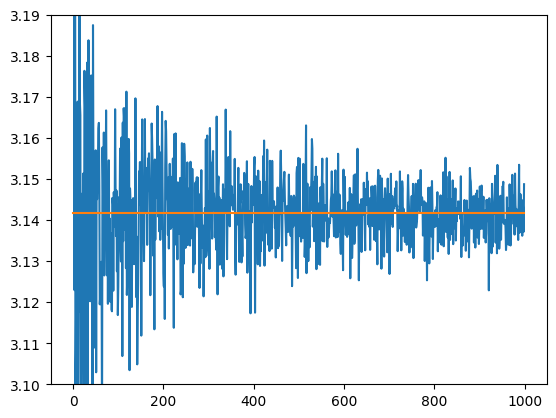

In [18]:
def monteCarlo_pi(num_samples):
  # Generate Random Points in the Unit Square
  x = np.random.uniform(0,1,num_samples)
  y = np.random.uniform(0,1,num_samples)

  # Calculate distances from the Origin
  distances = np.sqrt(x**2 + y**2)

  # Calculate Points inside the Unit Circle
  inside_circle = np.sum(distances <= 1)

  # Estimate pi
  pi_estimate = 4 * inside_circle / num_samples

  # Return
  return pi_estimate

# Run Simpulation and Graph
list = []
pi_list = []
error_list = []
for i in range(1,100000,100):
  num_samples = i # Iteration of Number of Samples
  pi_estimate = monteCarlo_pi(i) # Monte Carlo
  error = abs(pi_estimate - np.pi) # Error
  if i % 10000 == 0:
    print(pi_estimate)
  #print(pi_estimate, error) # Print Result
  list.append(pi_estimate) # Append Value for Graph
  pi_list.append(np.pi)
  error_list.append(error)

# Plot Result vs pi
plt.plot(list)
plt.plot(pi_list)
plt.ylim((3.1,3.19))


# Integration Example
To estimate an integral $I \approx \int^{b}_{a}f(x)dx$, Monte Carlo methods involve sampling $x_1,x_2,...,x_n$ uniformly from [a,b] and approximating:
$$I \approx (b-a)\frac{1}{n}\sum^{n}_{i=1}f(x_i)$$

Let us observe the integral:
$$\int^{1}_{0}e^xdx$$
Analytically:
$$\int^{1}_{0}e^xdx=e^x|^{1}_{0}=e^{1}-e^{0}=e-1 \approx 1.7183$$
Now, we will use Monte Carlo to solve the integral:



In [19]:
from re import X
def monteCarloInt(num_samples):
  # Generate Random Points in [0,1]
  x = np.random.uniform(0,1, num_samples)
  #x = np.random.normal(0,1,num_samples)

  # Evaluate the Function
  f_values = np.e**x

  # Compute the Integral Estimate
  int_estimate = np.mean(f_values)
  return int_estimate

# Approximate the Integral
num_samples = 100000
result = monteCarloInt(num_samples) #monte Carlo
print("Monte Carlo Sim: ",result) # Result od Simulation
print("Actual Result: ",np.e - 1) # Actual Number
print("Error: ",result - (np.e - 1)) # Error

Monte Carlo Sim:  1.7199844220053682
Actual Result:  1.718281828459045
Error:  0.0017025935463230724


# Error Analysis

Theoretical Error Bound:
The Monte Carlo estimate for the integral is:
$$I \approx \frac{1}{N}\sum^{N}_{i=1}f(x_i)$$,
where $N$ is the number of random samples.

Exected Value:
$$E[I_{MC}]=I$$

Variance:
$$\text{Var}(I_{MC})=\frac{\sigma^2}{N}$$
where $\sigma^2$ is the variance of the function $f$ over he integration domain.

Standard Error:
$$SE(\hat{I})=\frac{\hat{\sigma}}{\sqrt{N}}$$

Confidence Intervals:
We can compute a confidence interval to quantify the uncertainty in the estimate. For a 95% confidence interval:
$$\text{CI}=\hat{I}±z\cdot SE(\hat{I})$$

We will run the monte carlo estimation on the interval with varying sample sizes to observe the 95% confidence interval for sample size 2, and sample size N.
</br>
Recall the integral:
$$\int^{1}_{0}e^xdx$$

In [20]:
# Error Analysis on the Above Integral

# Initiate Lists
res_list = [] # Results of Integral
error_estimateList = [] # Error Estimate
st_error_list = [] # Standard Error
leftCI = [] # Left Confidence Interal
rightCI = [] # Right Confidence Interval
diffList = [] # Difference in Left and Right Confidence Intervals

# ------------------- Loop for MC Estimates and Errors ----------------------
start = 2
incriment = 100
for i in range(start,100000,incriment):
  result = monteCarloInt(i) # Monte Carlo Estimate
  error_estimate = (1/(i-1))*(result - (np.e - 1))**2 # Error Estimate
  standard_error = np.sqrt(error_estimate)/np.sqrt(i)# Standard Errror
  z = sp.stats.norm.ppf(0.975) # z-score

  # Compute Confidence Intervals
  left_con = result - z * standard_error
  right_con = result + z * standard_error
  diff = right_con - left_con

  # Append Lists with Values
  res_list.append(result)
  error_estimateList.append(error_estimate)
  st_error_list.append(standard_error)
  leftCI.append(left_con)
  rightCI.append(right_con)
  diffList.append(diff)

# ----------------------------- Results -----------------------------------
print("Integral Estimate, CI Range:")
print(res_list[0],diffList[0]) # First Iteration of MC
print(res_list[incriment - start],
      diffList[incriment - start]) # Last Iteration of MC

# ------------------ Compute Confidence Intervals --------------------------
#plt.plot(diffList) # Confidence Interval Window
#plt.title("Confidence Interval Window as N Increases")

# ------------------------- More Plots -------------------------------------
#plt.plot(res_list) #  Plot Estimated Integral
#plt.plot(leftCI) # Plot Left Confidence Interval
#plt.plot(rightCI) # Plot Right Confidence Interval
#plt.ylim(1.6,1.8)
# Graph of Error Estimates
# Graph of error


Integral Estimate, CI Range:
1.998147647041761 0.775734216557078
1.7155185620037605 1.105117122701671e-06


Let us graph the the integral estimate as the number of MC iterations increase.

Text(0.5, 1.0, 'Monte Carlo Integral Estimate vs. Iterations')

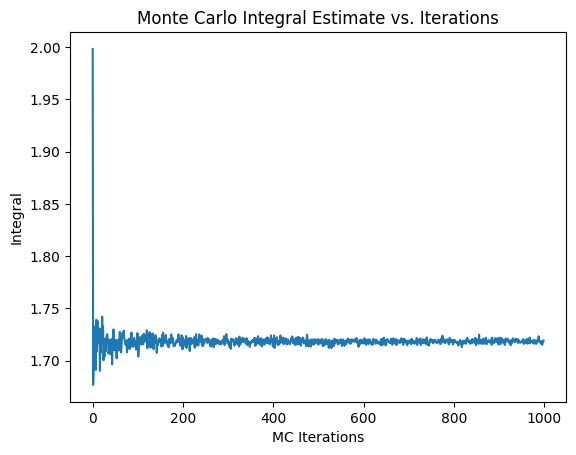

In [21]:
# Integral Estimate Graph
plt.plot(res_list) # Integral Estimate
plt.xlabel('MC Iterations')
plt.ylabel('Integral')
plt.title('Monte Carlo Integral Estimate vs. Iterations')

Now, let us evaluate a more difficult integral.
$$I = \int^{1}_{0}\int^{1}_{0}\int^{1}_{0}e^{-(x^2+y^2+z^2)}\text{dx dy dz}$$
This integral has no closed form solution. It can be expressed in terms of the error function **erf**. However, with Monte Carlo, we can approximate this integral. Here is the implimentation:

In [22]:
def monteCarlo_trip(num_samples):
  # Generate Random Samples in [0,1],[0,1],[0,1]
  x = np.random.uniform(0,1, num_samples)
  y = np.random.uniform(0,1, num_samples)
  z = np.random.uniform(0,1, num_samples)

  # Evaluate the Function
  f_values = np.e**(-1*(x**2 + y**2 + z**2))

  # Compute the Integral Estimate
  V = 1 # Volume of the Unit Cube
  int_estimate = V * np.mean(f_values)
  return int_estimate

# Approximate the Integral
num_samples = 10000
result = monteCarlo_trip(num_samples)
print(result)

0.41798779761413496
